# Ôn tập giữa kỳ


In [75]:
# Import các thư viện thông dụng
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import các distribution packages từ thư viện scipy
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm
from scipy.stats import t


## ĐỀ BÀI

Hệ thống giám sát rủi ro dựa trên hành vi (The Behavior Risk Factor Surveilance System - BRFSS) là một cuộc khảo sát qua điện thoại hàng năm với 350.000 người ở Hoa Kỳ. Như tên gọi của nó, BRFSS được thiết kế để xác định các yếu tố nguy cơ ở người trưởng thành và báo cáo các xu hướng sức khỏe mớ. Ví dụ, người trả lời được hỏi về chế độ ăn uống và hoạt động thể chất hàng tuần, tình trạng HIV/AIDS, khả năng sử dụng thuốc lá và thậm chí cả mức độ chi trả dịch vụ chăm sóc sức khỏe của họ. 

Bộ dữ liệu **brfss_2000** chứa thông tin khảo sát năm 2000, với hơn 200 thông tin. Trong bộ dữ liệu này, ta chỉ khảo sát một số thông tin sau:
-	genhlth: người khảo sát tự đánh giá sức khỏe (excellent, very good, good, fair or poor)
-	exerany: cho biết có hoạt động thể chất nào trong tháng gần nhất hay không, có (1), không (0)
-	hlthplan: có bảo hiểm (1) hay không (0)
-	smoke100: tổng số điếu thuốc đã hút ít nhất
-	height: chiều cao (inches)
-	weight: cân nặng (pounds)
-	wtdesire:  cân nặng mong muốn(pounds)
-	age: tuổi
-	gender: giới tính: nam(m), nữ(f)


### Câu 1:

Đọc hai bộ dữ liệu trên và cho biết mỗi bộ dữ liệu có kích thước bao nhiêu dòng, bao nhiêu cột?

In [76]:
df = pd.read_csv("brfss_2000.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   exerany   20000 non-null  int64 
 1   hlthplan  20000 non-null  int64 
 2   smoke100  20000 non-null  int64 
 3   height    20000 non-null  int64 
 4   weight    20000 non-null  int64 
 5   wtdesire  20000 non-null  int64 
 6   age       20000 non-null  int64 
 7   gender    20000 non-null  object
 8   genhlth   20000 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.4+ MB


### Câu 2

a, Tính tỷ lệ nam nữ

b, Trong số những người tập thể thao, tỷ lệ những người tự đánh giá có sức khỏe kém là bao nhiêu?

In [77]:
m,n = df['gender'].value_counts()
print(f"Nam: {m}, Nữ: {n}")
a,b,c,d,e = df['genhlth'].value_counts()
print(df['genhlth'].value_counts())
print(e/ df['genhlth'].count() * 100)

Nam: 10431, Nữ: 9569
genhlth
very good    6972
good         5675
excellent    4657
fair         2019
poor          677
Name: count, dtype: int64
3.385


### Câu 3

a, Đổi đơn vị chiều cao từ inches sang centimet, đơn vị cân nặng từ pound sang kg.

b, Tính tỷ lệ những người muốn giảm cân.

In [78]:
# Đổi từ inches sang centimet
def inches_to_cm(inches):
    return inches * 2.54

# Đổi từ pound sang kg
def pounds_to_kg(pounds):
    return pounds * 0.453592

# Chuyển đổi đơn vị
df['height'] = df['height'].apply(inches_to_cm)
df['weight'] = df['weight'].apply(pounds_to_kg)
df['wtdesire'] = df['wtdesire'].apply(pounds_to_kg)

# Tính toán cột giảm cân
df['giamcan'] = df['weight'] > df['wtdesire']
a,b = df['giamcan'].value_counts()
print(df['giamcan'].value_counts())
print(a / df['giamcan'].count() * 100)

giamcan
True     12764
False     7236
Name: count, dtype: int64
63.82


### Câu 4:

a, Theo bạn trong các thuộc tính trên, thuộc tính nào có phân phối chuẩn. Vẽ hình minh họa

b, Vẽ đồ thị boxplot so sánh cân nặng của những người có tập thể dục

In [79]:

# 1. Phân phối Chuẩn (Normal Distribution)
# Chiều cao, cân nặng của người trong một quần thể.
# Điểm thi của học sinh trong một kỳ thi lớn.
# Sai số đo lường trong thiết bị cảm biến.
# Huyết áp, nhiệt độ cơ thể con người.

# 2. Phân phối Nhị Thức (Binomial Distribution)
# Số lần một sản phẩm bị lỗi trong 10 sản phẩm lấy ngẫu nhiên từ dây chuyền sản xuất.
# Xác suất trúng xổ số khi mua 5 tấm vé.
# Số học sinh đậu trong một kỳ thi nếu mỗi học sinh có xác suất đậu là 
# Số người đồng ý tham gia khảo sát trong số 100 người được hỏi.

# 3. Phân phối Poisson (Poisson Distribution)
# Số cuộc gọi đến tổng đài trong một giờ.
# Số tai nạn giao thông xảy ra trong một ngày ở một thành phố.
# Số lỗi phần mềm được phát hiện trong 1000 dòng code.
# Số khách đến cửa hàng trong một giờ nhất định.1. Phân phối Chuẩn (Normal Distribution)
# Đặc điểm: Dữ liệu liên tục, có xu hướng tập trung quanh giá trị trung bình, đối xứng hai bên.
# Ví dụ:
# Chiều cao, cân nặng của người trong một quần thể.
# Điểm thi của học sinh trong một kỳ thi lớn.
# Sai số đo lường trong thiết bị cảm biến.
# Huyết áp, nhiệt độ cơ thể con người.



### Câu 5

Phân bố tuổi tác trong mẫu: Hãy mô tả phân bố tuổi của người tham gia khảo sát. Tuổi trung bình, độ lệch chuẩn, và các phân vị 25%, 50%, 75% là bao nhiêu?



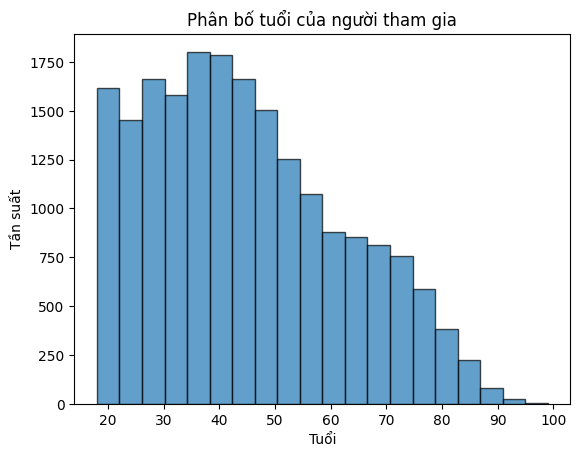

Tuổi trung bình: 45.06825
Độ lệch chuẩn: 17.19268947448503
Phân vị 25%: 31.0
Phân vị 50% (Median): 43.0
Phân vị 75%: 57.0


In [80]:
# Phân bố tuổi
plt.hist(df['age'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Phân bố tuổi của người tham gia')
plt.xlabel('Tuổi')
plt.ylabel('Tần suất')
plt.show()

# Các thống kê mô tả
mean_age = df['age'].mean()
std_age = df['age'].std()
percentiles = df['age'].quantile([0.25, 0.5, 0.75])

print(f"Tuổi trung bình: {mean_age}")
print(f"Độ lệch chuẩn: {std_age}")
print(f"Phân vị 25%: {percentiles[0.25]}")
print(f"Phân vị 50% (Median): {percentiles[0.5]}")
print(f"Phân vị 75%: {percentiles[0.75]}")


### Câu 6

Tỉ lệ người hút thuốc: Tính tỉ lệ phần trăm người tham gia khảo sát hiện đang hút thuốc lá. Liệu có sự khác biệt đáng kể về tỉ lệ này giữa các nhóm tuổi khác nhau không?



smoke100
0    10559
1     9441
Name: count, dtype: int64


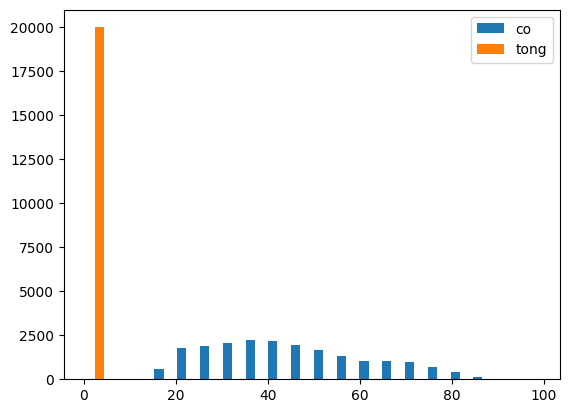

In [81]:
print(df['smoke100'].value_counts())
plt.hist(df[['age', 'smoke100']], bins=20)
plt.legend(['co', 'tong'])
plt.show()

### Câu 7

BMI trung bình theo giới tính: Tính chỉ số BMI trung bình cho nam và nữ trong mẫu. 



### câu 8

Phân tích tỉ lệ bệnh béo phì: Sử dụng các tiêu chuẩn của CDC về chỉ số BMI để phân loại người tham gia vào nhóm béo phì. Tính tỉ lệ béo phì theo giới tính và độ tuổi. 

In [82]:
print(df['age'].apply(lambda x: 1 if x >50 else 0))
df['x2Age'] = df['age'].apply(lambda x: x**2)
df['x3age']  = [x**3 for x in df['age']]
df['ageLe'] = df['age'].apply(lambda x: x if x %2 ==0 else 0)
# Sắp xếp tuổi
print(df.sort_values(by='age', ascending=True))


0        1
1        0
2        0
3        0
4        1
        ..
19995    0
19996    0
19997    1
19998    1
19999    1
Name: age, Length: 20000, dtype: int64
       exerany  hlthplan  smoke100  height     weight   wtdesire  age gender   
8376         1         1         0  187.96  90.718400  86.182480   18      m  \
6899         1         1         0  175.26  81.646560  68.038800   18      f   
16093        1         1         0  182.88  68.038800  68.038800   18      m   
6919         1         1         0  170.18  49.895120  49.895120   18      f   
12315        1         1         0  167.64  74.842680  74.842680   18      f   
...        ...       ...       ...     ...        ...        ...  ...    ...   
11911        0         1         0  157.48  49.895120  49.895120   95      f   
17050        1         1         1  162.56  58.059776  58.059776   96      f   
10349        1         1         1  152.40  58.966960  58.966960   97      f   
6709         1         1         1  157.

---